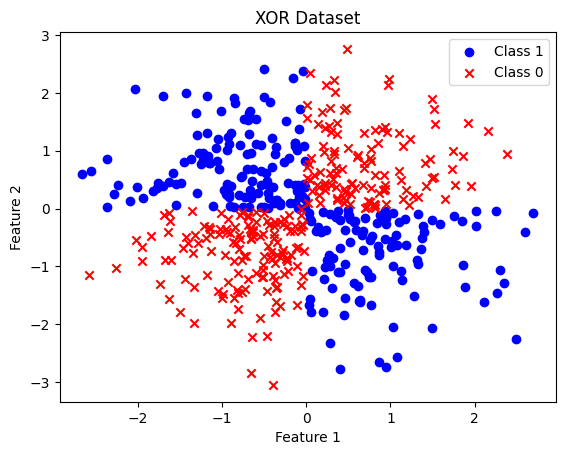

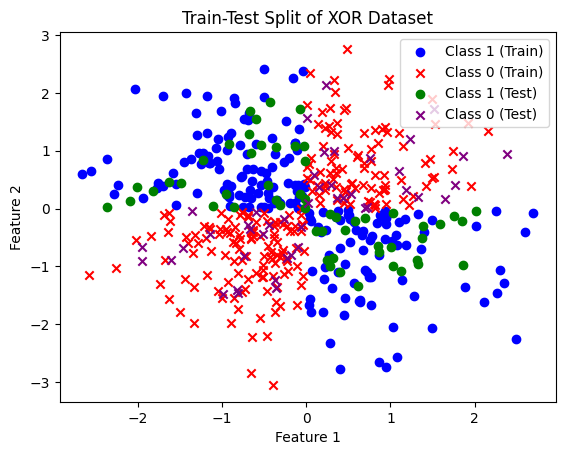

Loss: 
 0.7068992594162867
Gradient Values:
Output Weights Gradient: 
 [[19.18115361]
 [17.41408892]]
Output Bias Gradient: 
 [[35.77578235]]
Hidden Weights Gradient: 
 [[-0.1099024   0.00148624]
 [-0.78171175 -0.56392654]]
Hidden Bias Gradient: 
 [[2.60547355 1.52775114]]


In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


np.random.seed(0)
X = np.random.randn(500, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
y = np.where(y, 1, 0)


plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', marker='o', label='Class 1')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', marker='x', label='Class 0')

plt.title('XOR Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.show()


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the training set
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='blue', marker='o', label='Class 1 (Train)')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='red', marker='x', label='Class 0 (Train)')

# Plot the testing set
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='green', marker='o', label='Class 1 (Test)')
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c='purple', marker='x', label='Class 0 (Test)')

plt.title('Train-Test Split of XOR Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.show()

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))

        self.weights_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def binary_cross_entropy_loss(self, y_true, y_pred):
        y_pred = np.clip(y_pred, 1e-15 , 1 - 1e-15 )
        return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


    def forward(self, x):
        # Hidden layer
        hidden_output = self.sigmoid(np.dot(x, self.weights_hidden)
        + self.bias_hidden)

        # Output layer
        output = self.sigmoid(np.dot(hidden_output, self.weights_output)
        + self.bias_output)

        return output, hidden_output

    def backward(self, x, y, output, hidden_output, learning_rate):
        loss = np.mean(self.binary_cross_entropy_loss(y, output))

        #output=y_pred
        # Backpro for output layer
        output_delta = (output - y)
        d_weights_output = np.dot(hidden_output.T, output_delta)
        d_bias_output = np.sum(output_delta, axis=0, keepdims=True)

        # Backpro for hidden layer
        hidden_error = np.dot(output_delta, self.weights_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(hidden_output)
        d_weights_hidden = np.dot(x.T, hidden_delta)
        d_bias_hidden = np.sum(hidden_delta, axis=0, keepdims=True)

        # Updating
        self.weights_output -= learning_rate * d_weights_output
        self.bias_output -= learning_rate * d_bias_output
        self.weights_hidden -= learning_rate * d_weights_hidden
        self.bias_hidden -= learning_rate * d_bias_hidden

        return loss, d_weights_output, d_bias_output, d_weights_hidden, d_bias_hidden

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output, hidden = self.forward(X)
            loss, d_weights_output, d_bias_output, d_weights_hidden, d_bias_hidden = self.backward(X, y, output, hidden, learning_rate)

input_size = X_train.shape[1]
hidden_size = 2
output_size = 1
learning_rate = 0.0001

model = NeuralNetwork(input_size, hidden_size, output_size)

output_train, hidden_train = model.forward(X_train)
# print("Result of Forward: ")
# print(output_train)

loss, d_weights_output, d_bias_output, d_weights_hidden, d_bias_hidden = model.backward(X_train, y_train.reshape(-1, 1), output_train, hidden_train,learning_rate)
# Displaying Loss and Gradient Information
print('Loss:', '\n', loss)
print('Gradient Values:')
print('Output Weights Gradient:', '\n', d_weights_output)
print('Output Bias Gradient:', '\n', d_bias_output)
print('Hidden Weights Gradient:', '\n', d_weights_hidden)
print('Hidden Bias Gradient:', '\n', d_bias_hidden)


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


iris = load_iris()
X, y = iris.data, iris.target

X = X/np.max(X)

encoder = OneHotEncoder()
y = encoder.fit_transform(y.reshape(-1, 1)).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

input_size = X_train.shape[1] # input layer size
hidden_size = 32 # hidden layer size
output_size = y_train.shape[1] # output layer size

# W1 = np.random.randn(input_size, hidden_size) * 0.01
# bl = np.zeros((1, hidden_size))
# W2 = np.random.randn(hidden_size, output_size) * 0.01
# b2 = np.zeros((1, output_size))

learning_rate = 0.1
num_epochs = 1000
batch_size = 16
l1_lambda = 0.001
l2_lambda = 0.001


# def relu(x) :
# # avoid numerical instability by subtracting max value
#   X -= np.max(x, axis=-1, keepdims=True)
#   exp_x = np.exp(x)
#   return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# def derivative_relu(x):
#   s = softmax(x)
#   return  s * (1 - s)

# def L1_reg(lambda_, W1, W2):
#   return lambda_ * (np.sum(np.abs (W1)) + np.sum(np.abs (W2)))

# def derivative_L1_reg(lambda_, W):
#   return lambda_ * np.sign(W)

# def L2_reg(lambda_, W1, W2):
#   return lambda_ * (np.sum(np.square (W1)) + np.sum(np.square(W2)))

# def derivative_L2_reg(lambda_, W):
#   return lambda_

# Assuming you have the necessary functions and variables defined above

class TwoLayerNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def categorical_cross_entropy_loss(self, y_true, y_pred):
        eps = 1e-15
        y_pred = np.clip(y_pred, eps, 1 - eps)
        loss = -np.sum(y_true * np.log(y_pred))/ y_true.shape[0]
        return loss

    def derivative_categorical_cross_entropy_loss(self, y_true, y_pred):
        return (y_pred - y_true) / y_true.shape[0]

    def softmax(self, x):
        x -= np.max(x, axis=-1, keepdims=True)
        exp_x = np.exp(x)
        return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

    def derivative_softmax(self, x):
        s = self.softmax(x)
        return s* (1 - s)

    def calculate_regularization_term(self, lambda_1, lambda_2, W):
        l1_term = lambda_1 * np.sign(W)
        l2_term = lambda_2 * W
        return l1_term + l2_term


    def forward_pass(self, X):
        # Hidden layer with ReLU activation
        self.hidden_layer = np.maximum(0, np.dot(X, self.W1) + self.b1)

        # Output layer with Softmax activation
        self.output_layer = self.softmax(np.dot(self.hidden_layer, self.W2) + self.b2)

        return self.output_layer

    def backward_pass(self, X, y, learning_rate, l1_lambda, l2_lambda):
        m = X.shape[0]  # Number of samples

        # Calculate loss
        loss = self.categorical_cross_entropy_loss(y, self.output_layer)

        # Compute gradients
        dL_dz = self.derivative_categorical_cross_entropy_loss(y, self.output_layer)
        dL_dz_hidden = np.dot(dL_dz, self.W2.T)
        dL_dz_hidden[self.hidden_layer <= 0] = 0  # ReLU derivative

        # Update weights and biases with regularization terms
        regularization_term_W2 = self.calculate_regularization_term(l1_lambda, l2_lambda, self.W2)
        regularization_term_W1 = self.calculate_regularization_term(l1_lambda, l2_lambda, self.W1)

        self.W2 -= learning_rate * (np.dot(self.hidden_layer.T, dL_dz) + regularization_term_W2)
        self.b2 -= learning_rate * np.sum(dL_dz, axis=0, keepdims=True)

        self.W1 -= learning_rate * (np.dot(X.T, dL_dz_hidden) + regularization_term_W1)
        self.b1 -= learning_rate * np.sum(dL_dz_hidden, axis=0, keepdims=True)

        return loss



# Create the neural network
neural_network = TwoLayerNeuralNetwork(input_size, hidden_size, output_size)

# Training loop
for epoch in range(num_epochs):
    total_loss = 0
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        # Forward pass
        output = neural_network.forward_pass(X_batch)

        # Backward pass and update weights
        loss = neural_network.backward_pass(X_batch, y_batch, learning_rate, l1_lambda, l2_lambda)
        total_loss += loss

    # Print average loss for the epoch
    avg_loss = total_loss / (X_train.shape[0] / batch_size)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss}")

# Test the model using the test set
test_output = neural_network.forward_pass(X_test)
test_loss = neural_network.categorical_cross_entropy_loss(y_test, test_output)
print(f"Test Loss: {test_loss}")


Epoch 1/1000, Loss: 1.1724913207150358
Epoch 2/1000, Loss: 1.172237028225942
Epoch 3/1000, Loss: 1.1720709297471712
Epoch 4/1000, Loss: 1.1719472971598743
Epoch 5/1000, Loss: 1.1718522485204703
Epoch 6/1000, Loss: 1.171774708867745
Epoch 7/1000, Loss: 1.1717073181426079
Epoch 8/1000, Loss: 1.171645949684323
Epoch 9/1000, Loss: 1.1715870774161996
Epoch 10/1000, Loss: 1.1715267220735681
Epoch 11/1000, Loss: 1.1714609664548603
Epoch 12/1000, Loss: 1.171386751177843
Epoch 13/1000, Loss: 1.1713032624294648
Epoch 14/1000, Loss: 1.1712081034832222
Epoch 15/1000, Loss: 1.1710988101950206
Epoch 16/1000, Loss: 1.1709715922012338
Epoch 17/1000, Loss: 1.1708233552061793
Epoch 18/1000, Loss: 1.1706500981970198
Epoch 19/1000, Loss: 1.170447044946247
Epoch 20/1000, Loss: 1.1702084831568722
Epoch 21/1000, Loss: 1.1699283650314627
Epoch 22/1000, Loss: 1.1695987205967098
Epoch 23/1000, Loss: 1.1692107127584301
Epoch 24/1000, Loss: 1.1687544404332775
Epoch 25/1000, Loss: 1.1682172727515885
Epoch 26/1000,